# Defining the question

### a) Specifying The Data Analytic question

> To identify who is more likely to click on ad on a blog site

### b) Defining the Metrics of success

> The successful EDA should have:
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform  univariate and bivariate analysis.
* From your insights provide a conclusion and recommendation.


### d) Recording the Experimental Design

> 1. Reading the data
> 2. Checking the data
> 3. External Data Source Validation
> 4. Tidying the dataset
> 5. Univariate Analysis
> 6. Bivariate Analysis

e) Data Relevance
The data is relevant since it has important columns:
* Daily.Time.Spent.on.Site - The time spent by viewers on the blog site
* Age - The age of the blog readers
* Area.Income 
* Daily.Internet.Usage
* Ad.Topic.Line
* City
* Male
* Country
* Timestamp
* Clicked.on.Ad

In [1]:
#Installing necessary packages in R
install.packages("data.table", dependencies=TRUE)
#Installing tidyverse
install.packages("tidyverse")
library(tidyverse)
library(lubridate)#work with dates
# load the ggplot2 library for plotting
library(ggplot2)
options(stringsAsFactors = FALSE)
install.packages("ggplot2")
library(ggplot2)
library('scales') # visualization
library('grid') # visualisation


library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs
install.packages("mlbench")
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("data.table", dependencies = TRUE):
“installation of package ‘data.table’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The

# Reading the dataset 

In [2]:
df <- read.csv(file ='advertising.csv', fileEncoding="UTF-8-BOM", na.strings = '..')


In [3]:
#Previewing the first six entries
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [4]:
#Previewing the last six columns
tail(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
#Checking for column names and datatypes

str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [6]:
#this will  give us the shape of the dataframe
dim(df)

[1] 1000   10

The dataset has 10 columns and 1000 rows

In [7]:
class(df)

[1] "data.frame"

In [8]:
# get column names
colnames(df)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [9]:
#Checking for the data summaries
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

## Validity

In [10]:
#Replacing column headings for better and faster analysis
df<-df %>% 
  rename(
    time_on_site = Daily.Time.Spent.on.Site,
    age = Age,
    income = Area.Income,
    internet_usage = Daily.Internet.Usage,
    topic_line = Ad.Topic.Line,
    city = City,
    country = Country,
    gender = Male,
    timestamp = Timestamp,
    clicked_on_ad = Clicked.on.Ad
      )

## Completeness

In [11]:
#identifying missing data using is.na()function
is.na(df)
#Checking number of missing values
length(which(is.na(df)))

time_on_site,age,income,internet_usage,topic_line,city,gender,country,timestamp,clicked_on_ad
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

The data is complete since there are no missing values

## Consistency

In [12]:
# Finding the duplicated rows in the dataset df 
# and assign to a variable duplicated_rows below
duplicated_rows <- df[duplicated(df),]
duplicated_rows

time_on_site,age,income,internet_usage,topic_line,city,gender,country,timestamp,clicked_on_ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


Our data is consistent since we have no duplicated values

# Uniformity

In [13]:
#Checking if we  have correct data types  for our variables
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ time_on_site  : num  69 80.2 69.5 74.2 68.4 ...
 $ age           : int  35 31 26 29 35 23 33 48 30 20 ...
 $ income        : num  61834 68442 59786 54806 73890 ...
 $ internet_usage: num  256 194 236 246 226 ...
 $ topic_line    : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ city          : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ gender        : int  0 1 0 1 0 1 0 1 1 1 ...
 $ country       : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ timestamp     : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ clicked_on_ad : int  0 0 0 0 0 0 0 1 0 0 ...


Seperating Timestamp to date variable and time variables.This will be of importance in the analysis

In [14]:
#Changing male and clicked on Ad variable from integer to a factor
df$gender <- factor(df$gender, labels = c("M", "F"))
df$clicked_on_ad <- factor(df$clicked_on_ad, labels = c('yes', 'no'))


In [15]:
#Seperating date from the timestamp variable
#assigning date into date varaible with date data type
df$date <- as.Date(df$timestamp)
#Displaying the first six
head(df)

,time_on_site,age,income,internet_usage,topic_line,city,gender,country,timestamp,clicked_on_ad,date
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<date>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,M,Tunisia,2016-03-27 00:53:11,yes,2016-03-27
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,F,Nauru,2016-04-04 01:39:02,yes,2016-04-04
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,M,San Marino,2016-03-13 20:35:42,yes,2016-03-13
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,F,Italy,2016-01-10 02:31:19,yes,2016-01-10
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,M,Iceland,2016-06-03 03:36:18,yes,2016-06-03
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,F,Norway,2016-05-19 14:30:17,yes,2016-05-19


In [16]:
#Seperating time from the timestamp variable
#assigning time into time varaible with character data type
df$time <- format(as.POSIXct(df$timestamp), format = "%H:%M:%S") 
#Previewing first six
head(df)

,time_on_site,age,income,internet_usage,topic_line,city,gender,country,timestamp,clicked_on_ad,date,time
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<date>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,M,Tunisia,2016-03-27 00:53:11,yes,2016-03-27,00:53:11
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,F,Nauru,2016-04-04 01:39:02,yes,2016-04-04,01:39:02
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,M,San Marino,2016-03-13 20:35:42,yes,2016-03-13,20:35:42
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,F,Italy,2016-01-10 02:31:19,yes,2016-01-10,02:31:19
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,M,Iceland,2016-06-03 03:36:18,yes,2016-06-03,03:36:18
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,F,Norway,2016-05-19 14:30:17,yes,2016-05-19,14:30:17


In [17]:
#Splitting the date column into year, month and day
df_date<-df %>%
  dplyr::mutate(year = lubridate::year(date), 
                month = lubridate::month(date), 
                day = lubridate::day(date))
#Deleting the timestampcolumn
df_date<-df_date %>% select(-timestamp)
#Changing into factors
df_date$year<- factor (df_date$year)
df_date$month<- factor(df_date$month)
df_date$day <- factor(df_date$day)
#Previewing the first six rows
head(df_date)

,time_on_site,age,income,internet_usage,topic_line,city,gender,country,clicked_on_ad,date,time,year,month,day
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<fct>,<date>,<chr>,<fct>,<fct>,<fct>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,M,Tunisia,yes,2016-03-27,00:53:11,2016,3,27
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,F,Nauru,yes,2016-04-04,01:39:02,2016,4,4
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,M,San Marino,yes,2016-03-13,20:35:42,2016,3,13
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,F,Italy,yes,2016-01-10,02:31:19,2016,1,10
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,M,Iceland,yes,2016-06-03,03:36:18,2016,6,3
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,F,Norway,yes,2016-05-19,14:30:17,2016,5,19


## Checking for outliers

### Numerical Variables

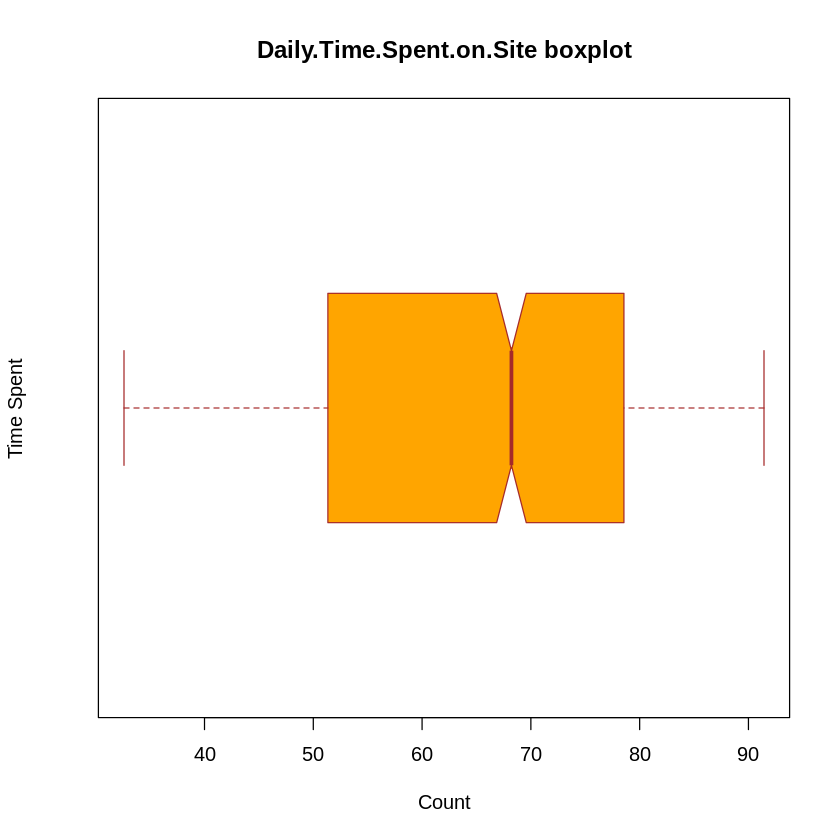

In [18]:
#Checking for outliers in the Daily.Time.Spent.on.Site variable
boxplot(df$time_on_site,
main = "Daily.Time.Spent.on.Site boxplot",
xlab = "Count",
ylab = "Time Spent",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE)

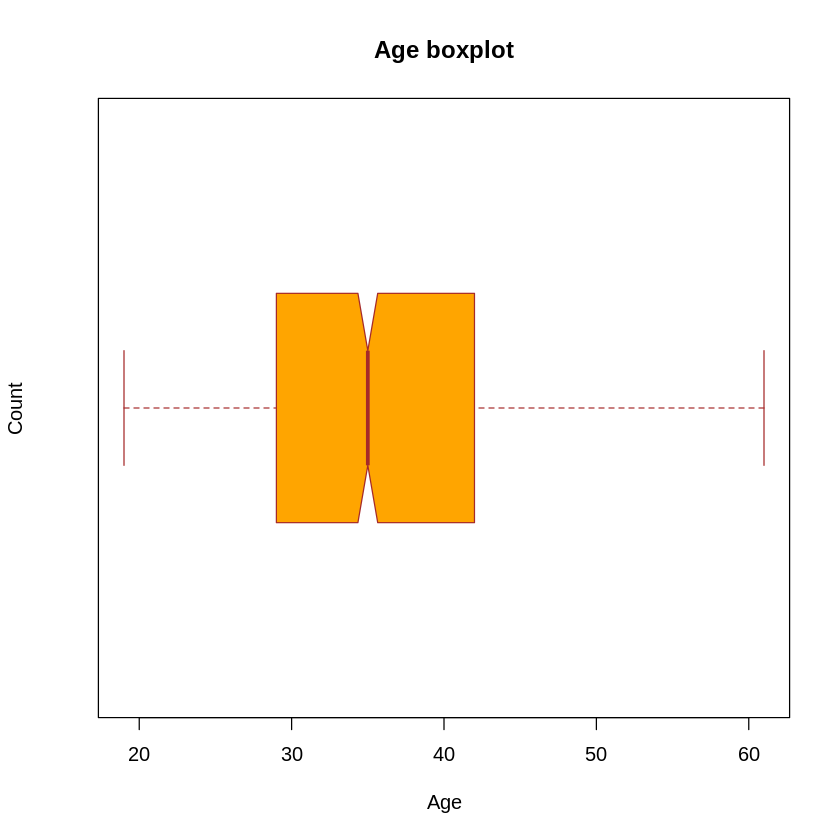

In [19]:
#Checking for outliers in the Age variable
boxplot(df$age,
main = "Age boxplot",
xlab = "Age",
ylab = "Count",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE)

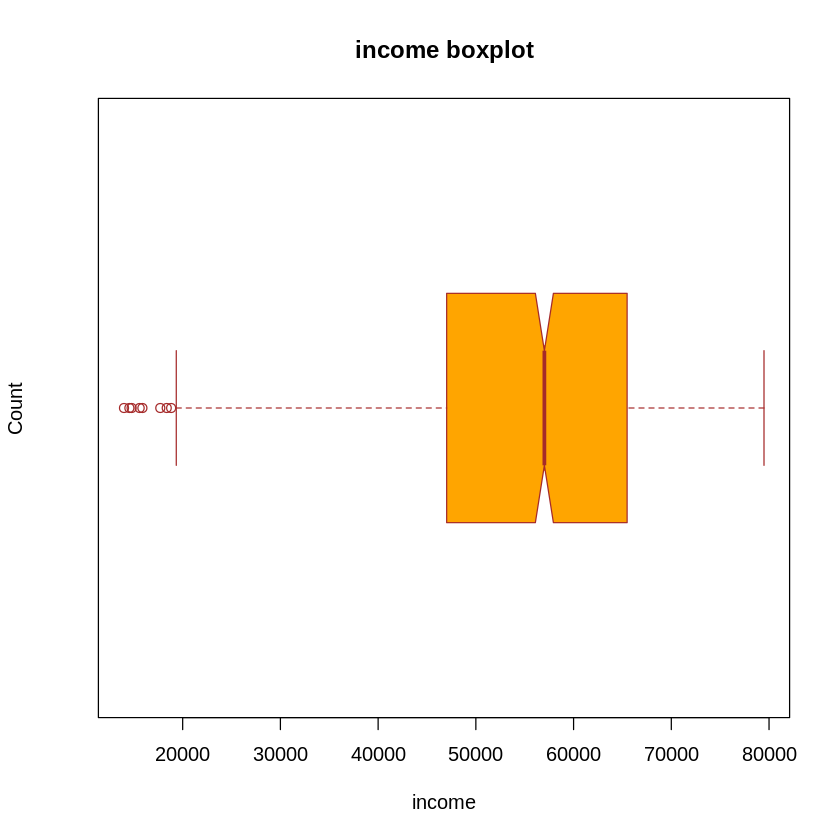

In [20]:
#Checking for outliers in the Area.income variable
boxplot(df$income,
main = "income boxplot",
xlab = "income",
ylab = "Count",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE)

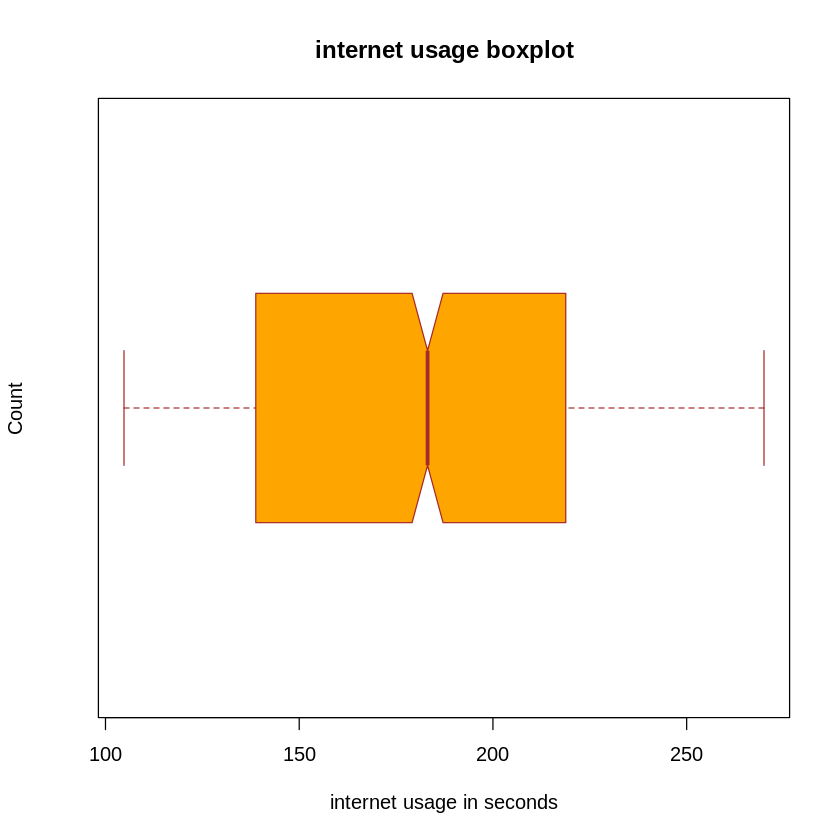

In [21]:
#Checking for outliers in the internet usage variable
boxplot(df$internet_usage,
main = "internet usage boxplot",
xlab = "internet usage in seconds",
ylab = "Count",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE)

Income variable was the only column variable with outiers. We will keep the outliers since they will be needed in the analysis

### Categorical variables

In [22]:
df<- dplyr::mutate(df, id = row_number())
df_date<- dplyr:: mutate(df_date, id= row_number())

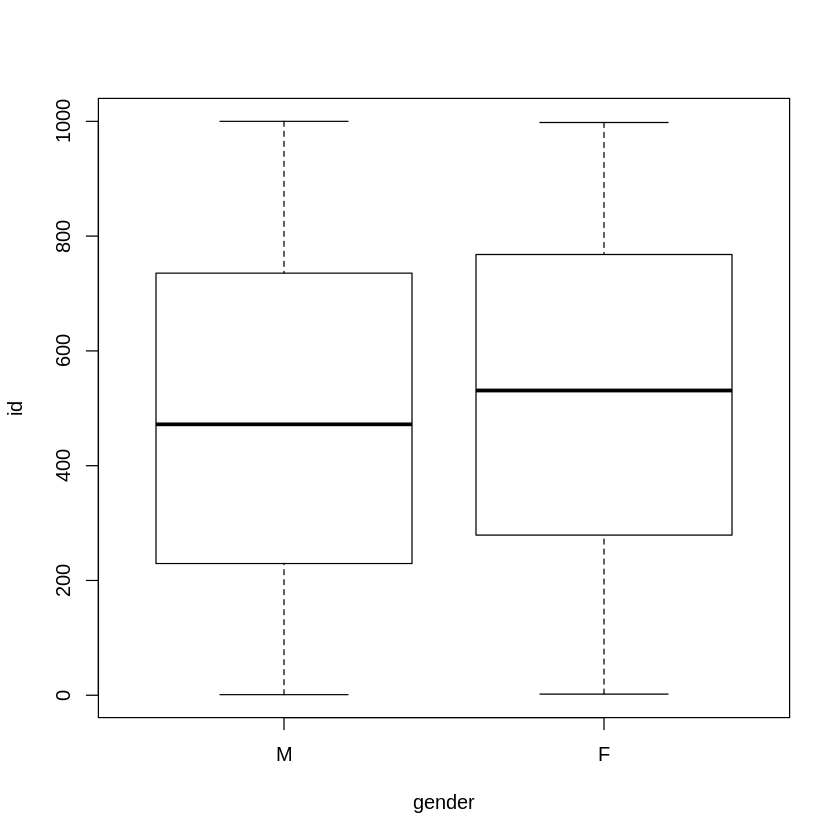

In [23]:
boxplot(id ~ gender , data= df)

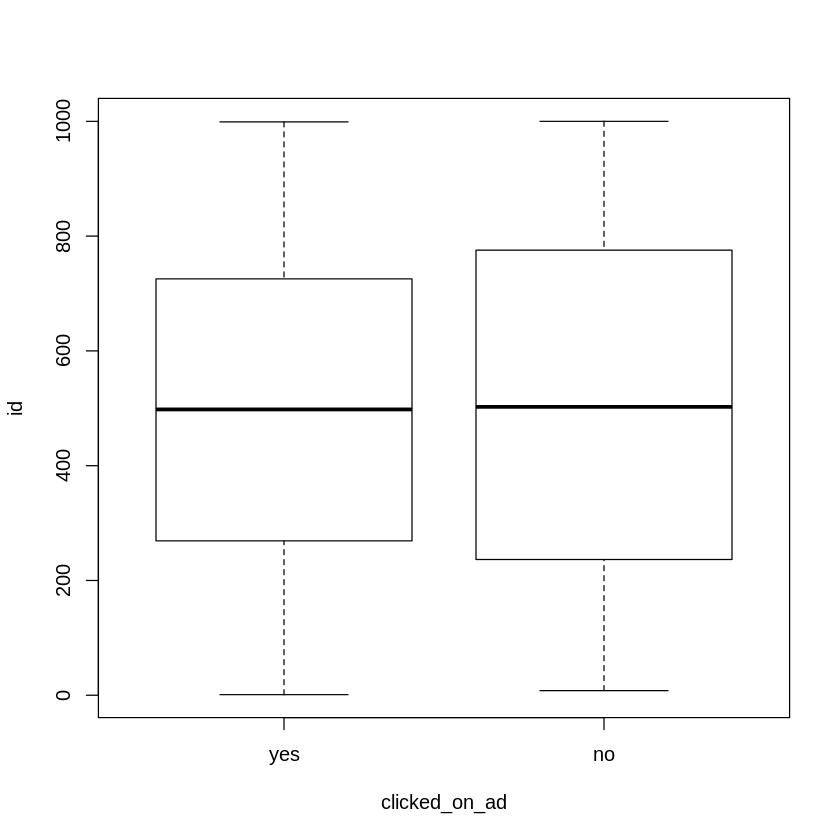

In [24]:
boxplot(id~clicked_on_ad, data = df)

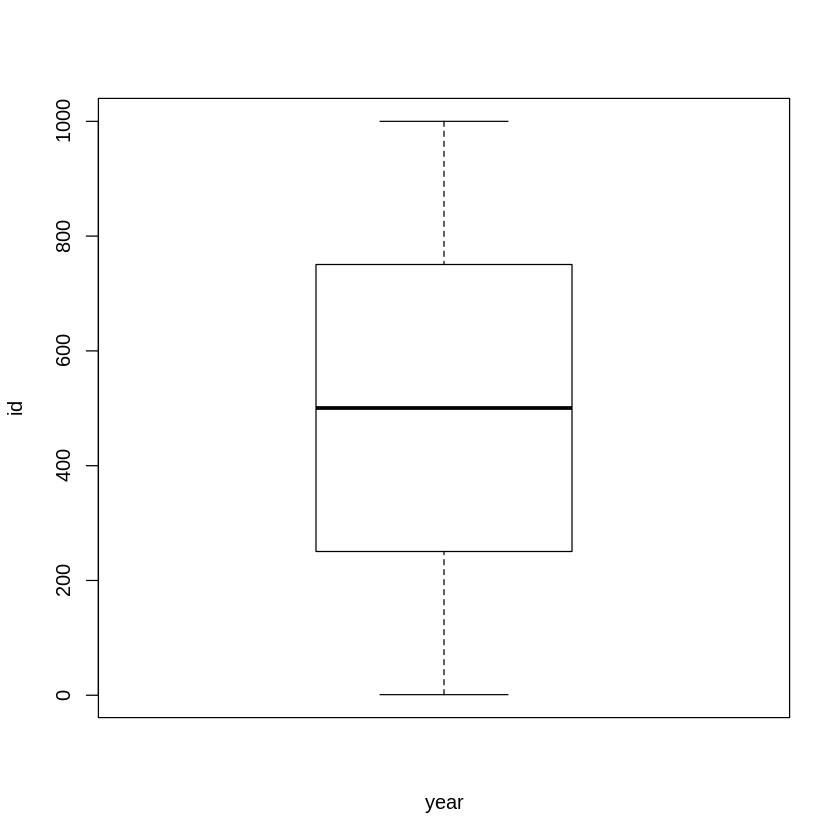

In [25]:
boxplot(id ~ year, data = df_date)

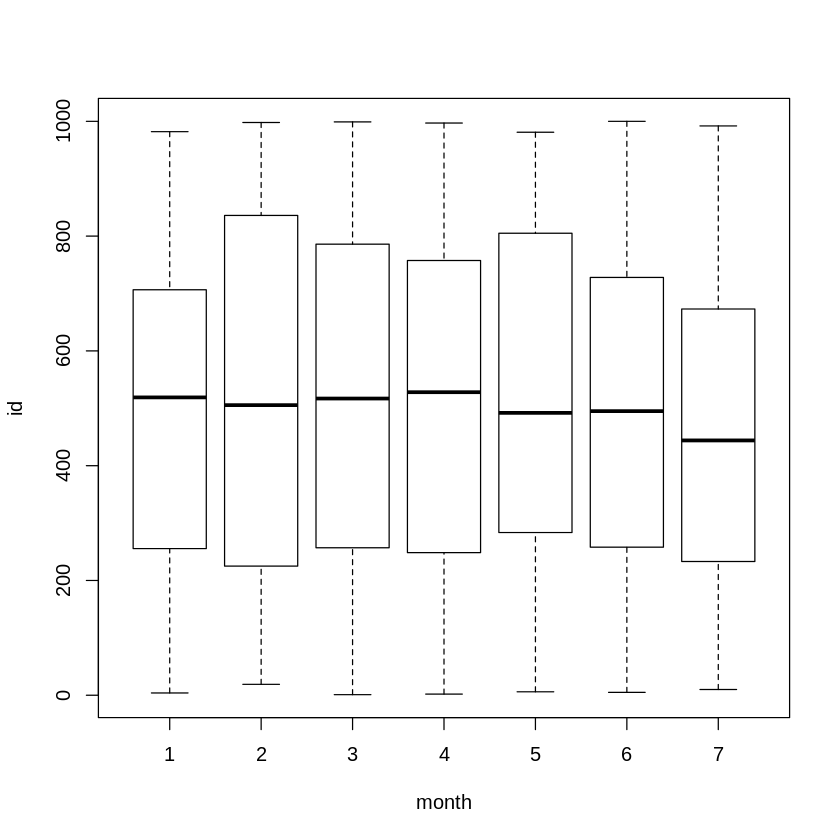

In [26]:
boxplot(id ~ month, data = df_date)

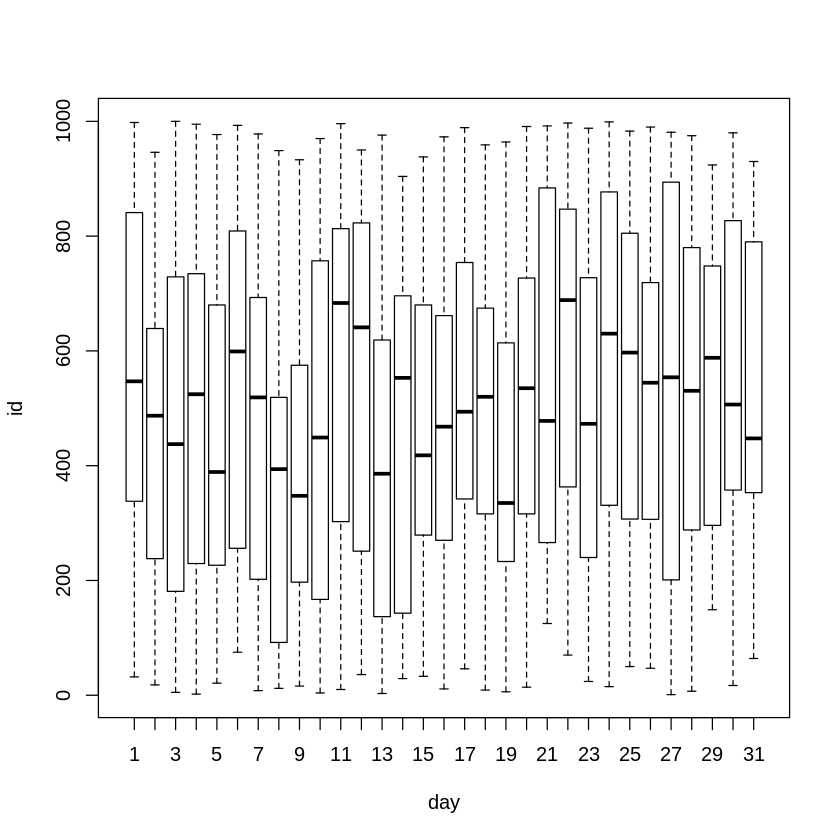

In [27]:
boxplot(id ~ day, data = df_date)

There are  no outliers in the categorical variables

# Univariate Analysis

In [28]:
#Selecting the numeric variables
df_num<-df_date %>% select_if(is.numeric)
head(df_num)

,time_on_site,age,income,internet_usage,id
,<dbl>,<int>,<dbl>,<dbl>,<int>
1,68.95,35,61833.90,256.09,1
2,80.23,31,68441.85,193.77,2
3,69.47,26,59785.94,236.50,3
4,74.15,29,54806.18,245.89,4
5,68.37,35,73889.99,225.58,5
6,59.99,23,59761.56,226.74,6


In [29]:
#Selecting factor variables
df_factor<- df_date%>% select_if(is.factor)
head(df_factor)

,gender,clicked_on_ad,year,month,day
,<fct>,<fct>,<fct>,<fct>,<fct>
1,M,yes,2016,3,27
2,F,yes,2016,4,4
3,M,yes,2016,3,13
4,F,yes,2016,1,10
5,M,yes,2016,6,3
6,F,yes,2016,5,19


In [30]:
#Selecting character variables
df_char <- df_date %>% select_if(is.character)
head(df_char)

,topic_line,city,country,time
,<chr>,<chr>,<chr>,<chr>
1,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,00:53:11
2,Monitored national standardization,West Jodi,Nauru,01:39:02
3,Organic bottom-line service-desk,Davidton,San Marino,20:35:42
4,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,02:31:19
5,Robust logistical utilization,South Manuel,Iceland,03:36:18
6,Sharable client-driven software,Jamieberg,Norway,14:30:17


## Measure Of central Tendancy

In [31]:
#Finding the mean of numerical variables grouped on clicked on ad
mean_df <-df %>%
  group_by(clicked_on_ad) %>%
  summarise_if(is.numeric, mean)
mean_df

clicked_on_ad,time_on_site,age,income,internet_usage,id
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,76.85462,31.684,61385.59,214.5137,493.538
no,53.14578,40.334,48614.41,145.4865,507.462


In [32]:
#Finding the mean of numerical variables grouped on clicked on ad
median_df <-df %>%
  group_by(clicked_on_ad) %>%
  summarise_if(is.numeric ,median)
median_df

clicked_on_ad,time_on_site,age,income,internet_usage,id
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,77.65,31,62275.40,216.365,498.0
no,51.53,40,49417.26,138.790,502.5


## Measures of Dispersion

In [33]:
#Calculating the std of the variables grouped on clicked on ad
sd_df <-df %>%
  group_by(clicked_on_ad) %>%
  summarise_if(is.numeric ,sd)
sd_df

clicked_on_ad,time_on_site,age,income,internet_usage,id
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,7.560031,6.212998,8904.06,23.87438,280.6835
no,12.822091,8.856598,14116.24,30.02583,296.8504


In [34]:
#Calculating variance of the variables grouped on clicked on ad
var_df <-df %>%
  group_by(clicked_on_ad) %>%
  summarise_if(is.numeric ,var)
var_df

clicked_on_ad,time_on_site,age,income,internet_usage,id
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,57.15408,38.60135,79282288,569.9861,78783.22
no,164.40601,78.43932,199268295,901.5502,88120.14


## Categorical Univariate Analysis

### Frequency Tables

In [35]:
#Fetching the gender column
gender<-df$gender
#Fetching the cicked on ad column
clicked<-df$clicked_on_ad
#Fetching the month 
month<- df_date$month
#Fetching the day
day<-df_date$day
#Fetching the country column
country<- df$country
#Fetching the city column
city<- df$city

#Finding the frequency tables
#Finding the frequency table for gender
gender_frequency<-table(gender)
gender_frequency
cat('***************')
#Finding the frequency table for clicked on ad
clicked_frequency<- table(clicked)
clicked_frequency
cat('*******************')
#Finding the frequency table for months
months_frequency <- table(month)
months_frequency
cat('************')
#Finding the frequency table for days
day_frequency <- table(day)
day_frequency
#Finding the frequency of country
country_frequency<- table(country)
country_frequency
#Finding the frequency of city
city_frequency<- table(city)
city_frequency

gender
  M   F 
519 481 

***************

clicked
yes  no 
500 500 

*******************

month
  1   2   3   4   5   6   7 
147 160 156 147 147 142 101 

************

day
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
33 25 46 36 35 25 32 35 34 37 32 29 30 33 41 35 42 35 29 33 32 24 35 33 23 36 
27 28 29 30 31 
35 30 29 28 18 

country
                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                      

city
              Adamsbury                Adamside               Adamsstad 
                      1                       1                       1 
               Alanview           Alexanderfurt           Alexanderview 
                      1                       1                       1 
          Alexandrafort              Alexisland              Aliciatown 
                      1                       1                       1 
           Alvaradoport             Alvarezland              Amandafort 
                      1                       1                       1 
            Amandahaven              Amandaland                 Amyfurt 
                      1                       1                       1 
               Amyhaven         Andersonchester            Andersonfurt 
                      1                       1                       1 
            Andersonton           Andrewborough             Andrewmouth 
                      1                       

### Bar charts

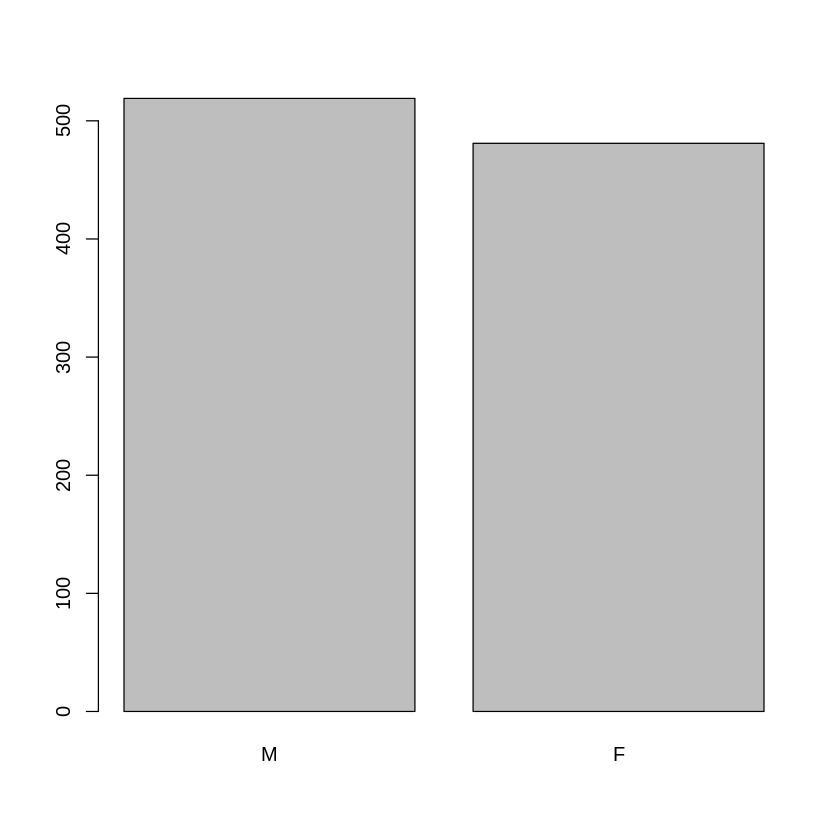

In [36]:
barplot(gender_frequency)

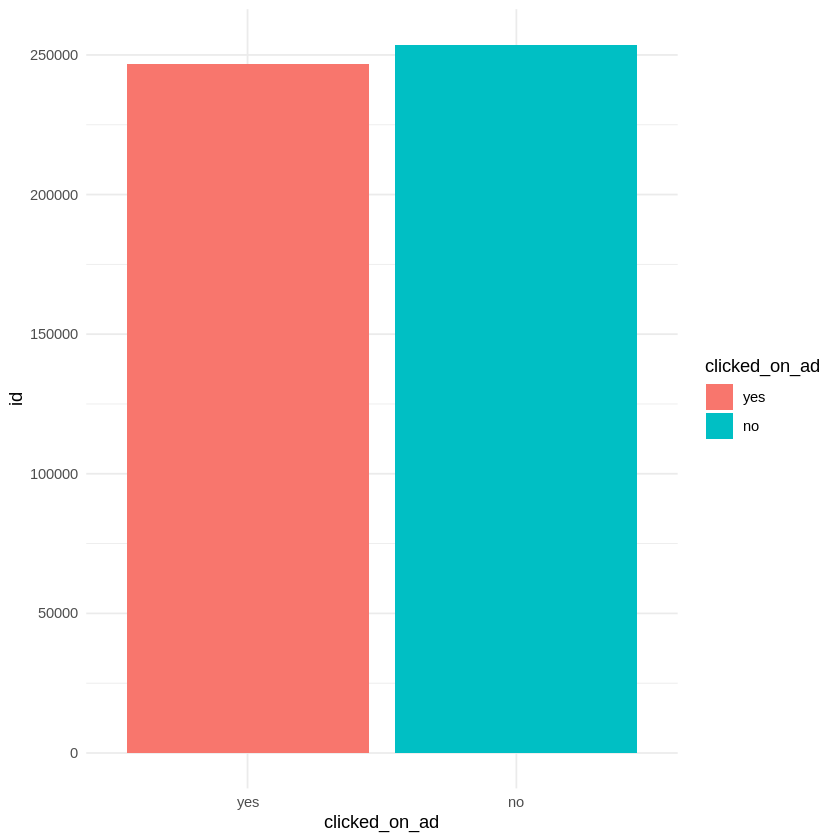

In [37]:
# Change barplot fill colors by groups
p<-ggplot(df, aes(x=clicked_on_ad, y=id, fill=clicked_on_ad)) +
  geom_bar(stat="identity")+theme_minimal()
p

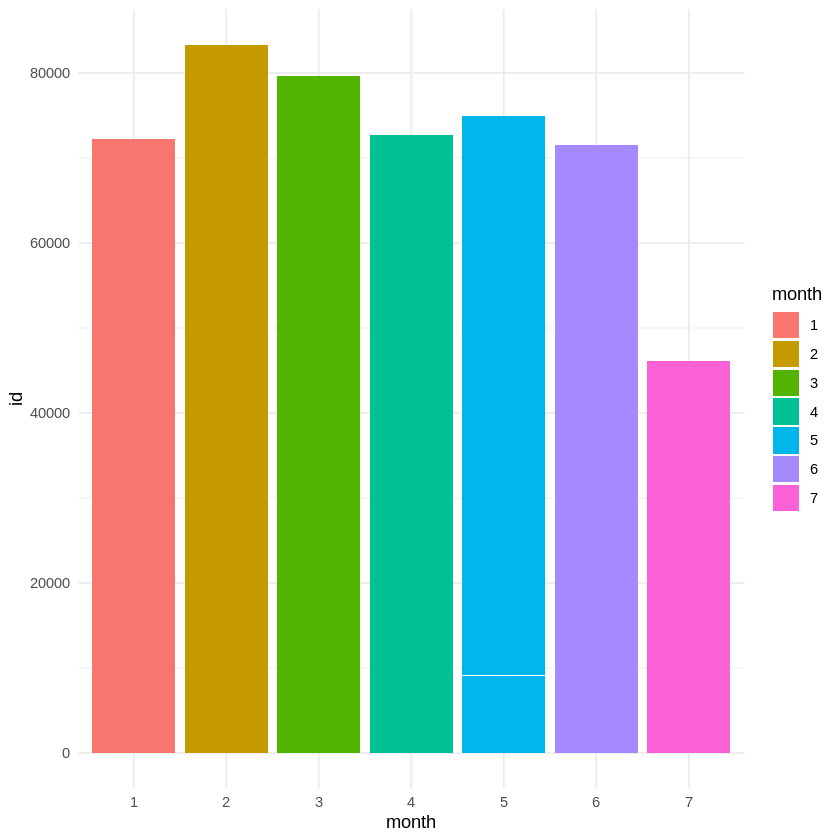

In [38]:
library(ggplot2)
# Change barplot fill colors by groups
p<-ggplot(df, aes(x=month, y=id, fill=month)) +
  geom_bar(stat="identity")+theme_minimal()
p

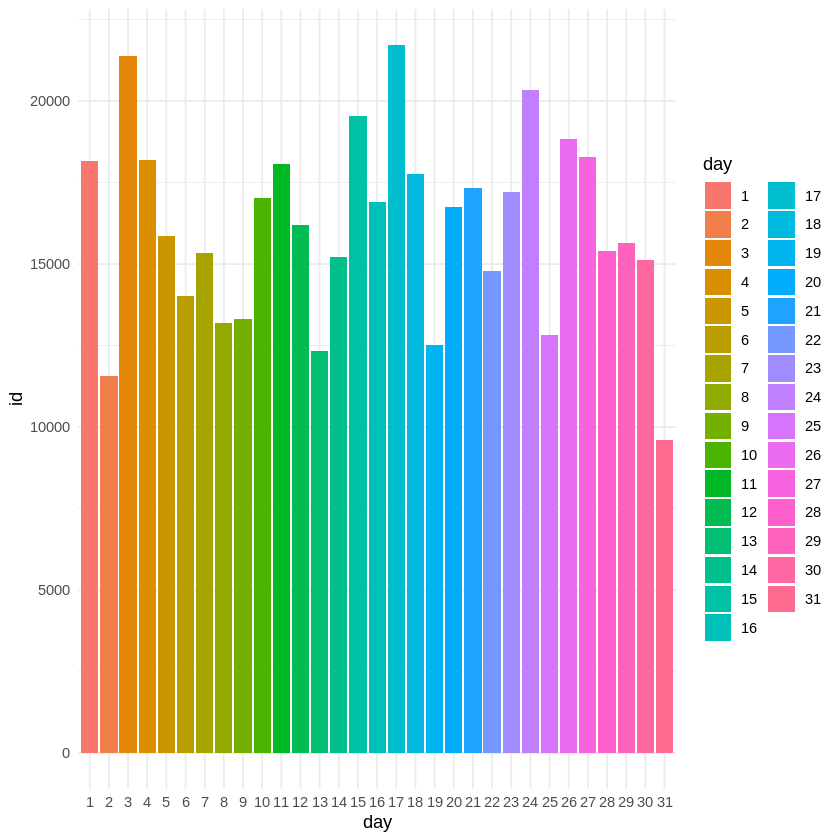

In [39]:
# Change barplot fill colors by groups
p<-ggplot(df, aes(x=day, y=id, fill=day)) +
  geom_bar(stat="identity")+theme_minimal()
p

## Frequency Graphs

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



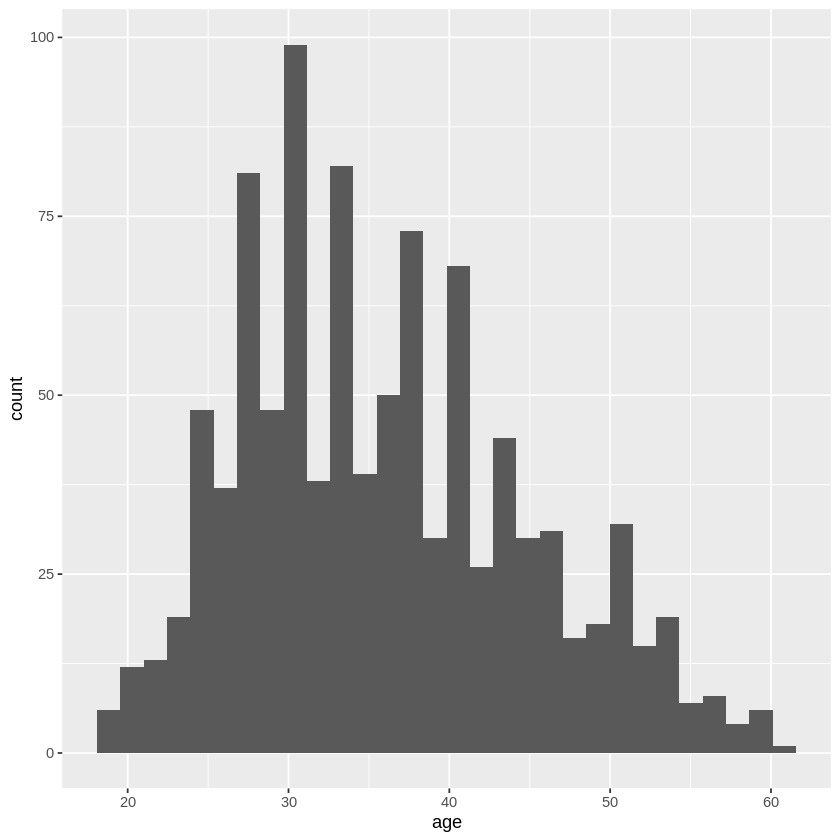

In [40]:
p7 <- ggplot(df, aes(x = age)) +
        geom_histogram()
p7

In [41]:
#Computing the range of Age variable
age_range<- range(df$age)
age_range

[1] 19 61

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



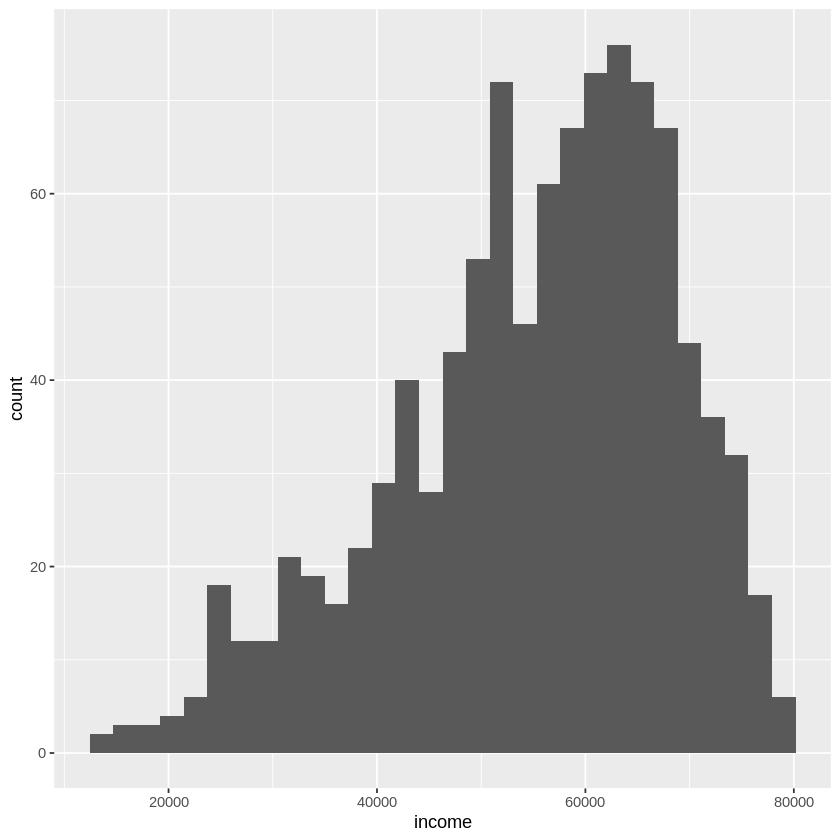

In [42]:
p7 <- ggplot(df, aes(x = income)) +
        geom_histogram()
p7

In [43]:
income_range<- range(df$income)
income_range

[1] 13996.5 79484.8

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



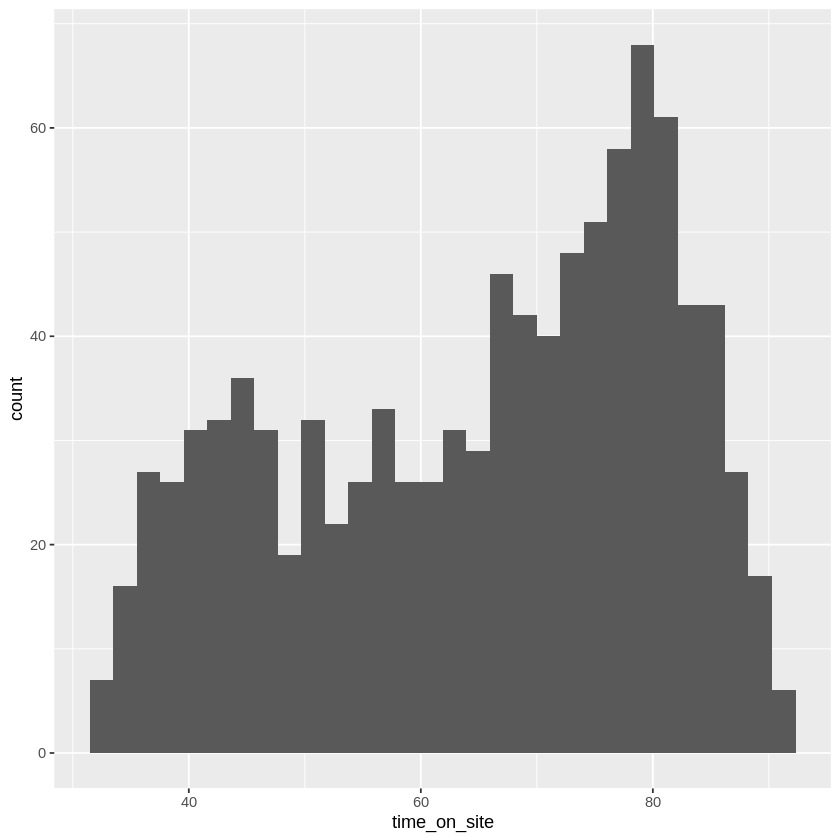

In [44]:
p7 <- ggplot(df, aes(x = time_on_site)) +
        geom_histogram()
p7

In [45]:
time_range<- range(df$time_on_site)
time_range

[1] 32.60 91.43

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



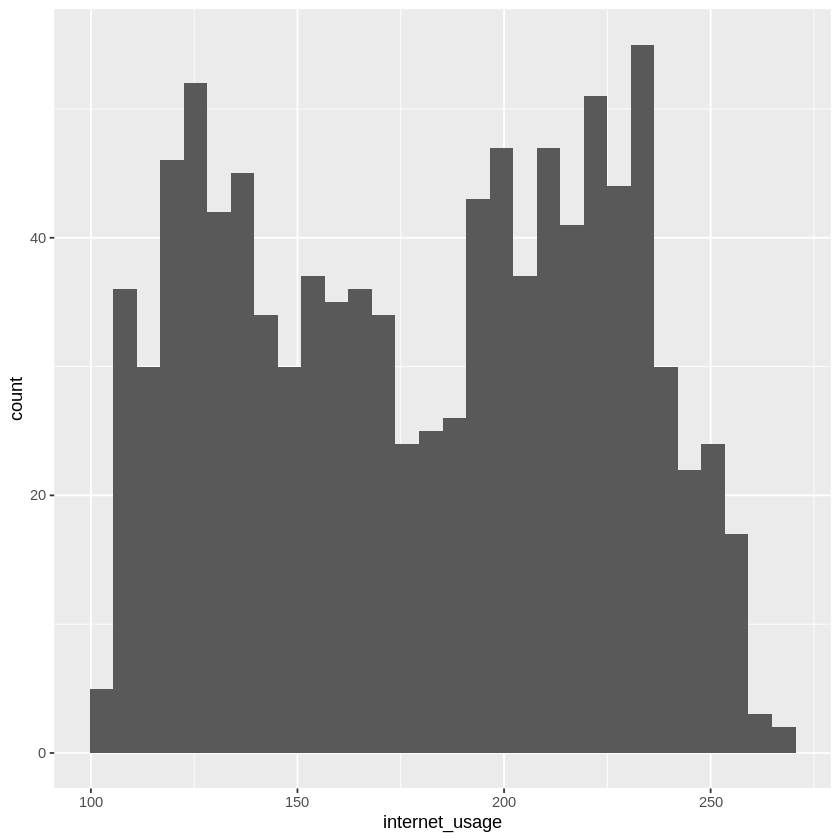

In [46]:
p7 <- ggplot(df, aes(x = internet_usage)) +
        geom_histogram()
p7

In [47]:
usage_range <- range(df$internet_usage)
usage_range

[1] 104.78 269.96

**Categorical Summaries:**
* Gender - is a factor variable. There are more males than females in the variable
* Clicked on ad - is a factor variabe. There are more viewers who did not click on the ad as compared to those who actually cicked on the ad
* Month - is a factor variable. There were more clicks in the 2,3 and 5 month as compared to other months. There was a significant decline in the seventh month.
* Day - is a factor variable. The 31st recorded the lowest number of clicks on ad

**Numerical Summaries:**
* Age- is a numerical variable. The age range of viewers is between 19 and 61. While between 30-40 year olds are the most viewers.
* Income - is a numerical variable. The income range is between 13,996.5 - 79,484.8. Most viewers earn between 50,000 to 70,000.
*  Time_on_site - is a numerical variable. The viewers time on site ranged between 32.6 - 91.43 seconds. Most viewers spend 70 to 90 seconds on the site.
* Internet Usage - is a numerical variable. The range of internet usage of viewers is between 104.78-269.96 seconds. 

# Bivariate Analysis

In [48]:
#Calculating the correlation summaries of numerical variables
install.packages("ggcorrplot")
library(ggcorrplot)

corr <- round(cor(df_num), 1)
corr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,time_on_site,age,income,internet_usage,id
time_on_site,1.0,-0.3,0.3,0.5,0.0
age,-0.3,1.0,-0.2,-0.4,0.0
income,0.3,-0.2,1.0,0.3,-0.1
internet_usage,0.5,-0.4,0.3,1.0,0.0
id,0.0,0.0,-0.1,0.0,1.0


#### Time_on_site against clicked on ad

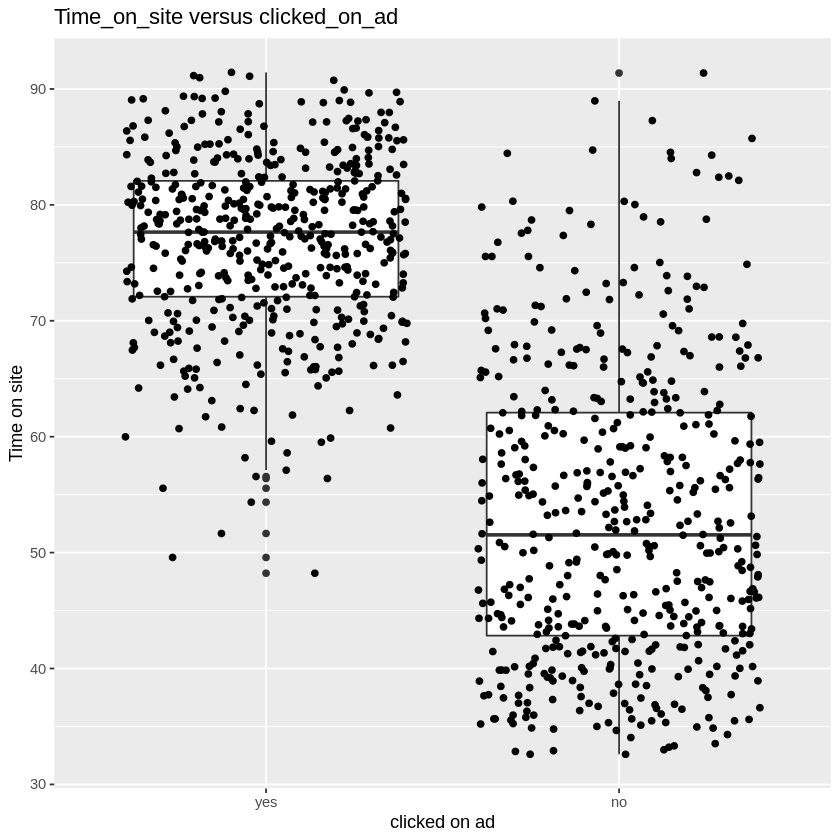

In [49]:
JitterPlot = qplot(clicked_on_ad, time_on_site, data=df, geom=c("boxplot", "jitter"), 
                   main="Time_on_site versus clicked_on_ad",xlab="clicked on ad", ylab="Time on site")
JitterPlot 

The viewers who were more likely to click on ad, spent more time on the blog site as compared to those who were not likely to click on site

#### Age against clicked on ad

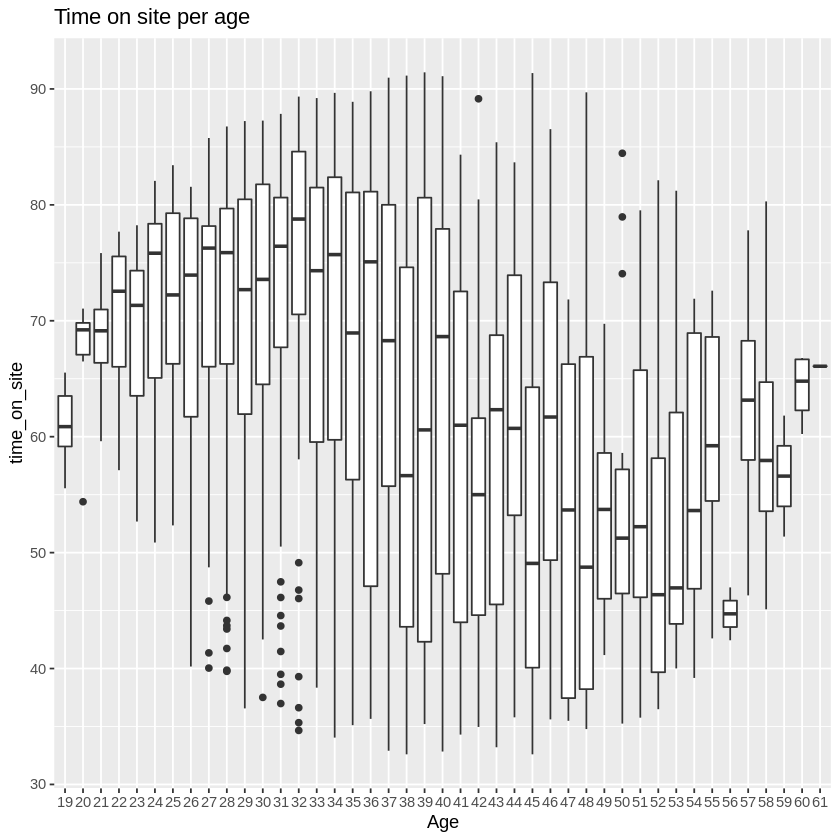

In [50]:
df %>% select(age,time_on_site ) %>% ggplot(aes(factor(age),time_on_site)) + geom_boxplot() + xlab('Age')+ 
      labs(title = "Time on site per age")

Viewers between age 19 and age 36 spend more time on the site as compared to 37 and above

#### Income against clicked on ad

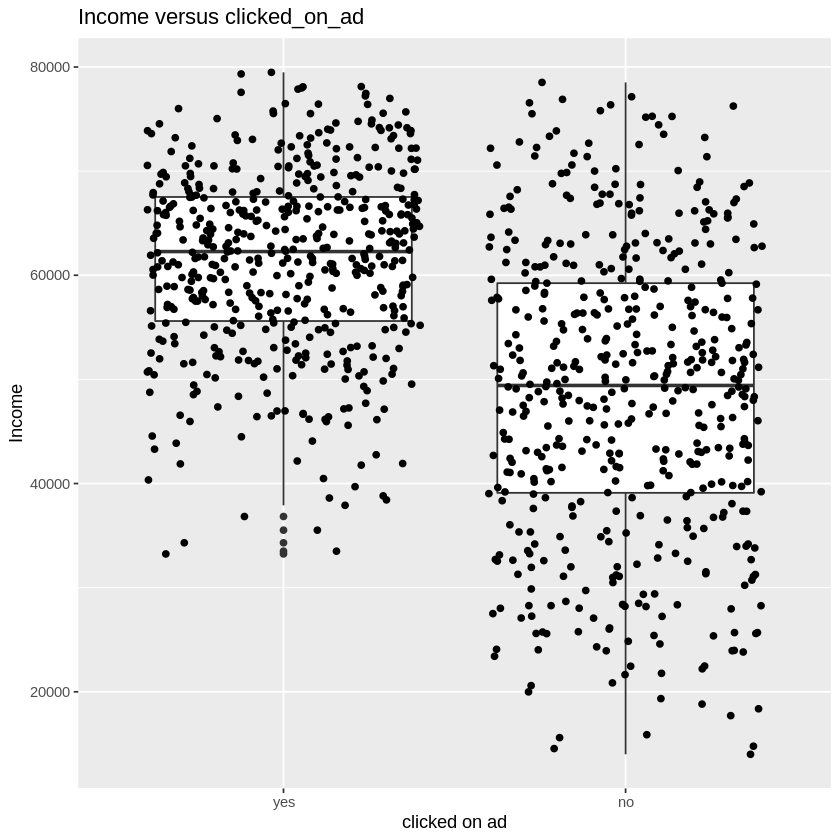

In [51]:
incomePlot = qplot(clicked_on_ad, income, data=df, geom=c("boxplot", "jitter"), 
                   main="Income versus clicked_on_ad",xlab="clicked on ad", ylab="Income")
incomePlot 

Viewers earning an 40,000 to 80,000 were more likely to click on the ads as compared to those less likely to click on the ads, those who earn below 40,000

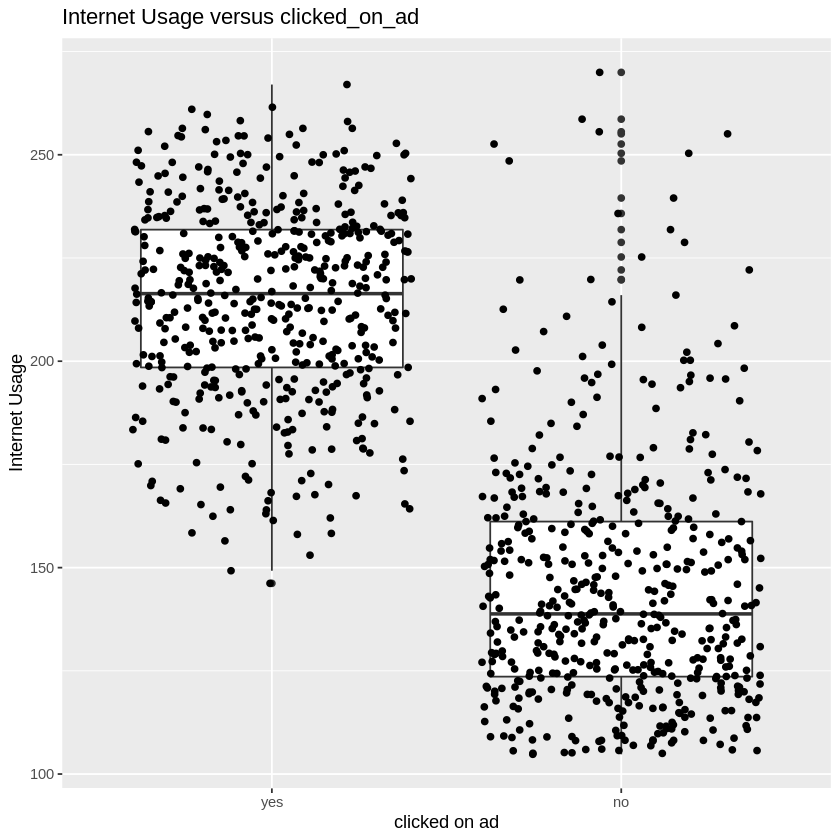

In [52]:
usagePlot = qplot(clicked_on_ad, internet_usage, data=df, geom=c("boxplot", "jitter"), 
                   main="Internet Usage versus clicked_on_ad",xlab="clicked on ad", ylab="Internet Usage")
usagePlot 

The viewers more likely to view the ad have more internet usage of about 150 - 250 .

#### Gender against clicked on ad

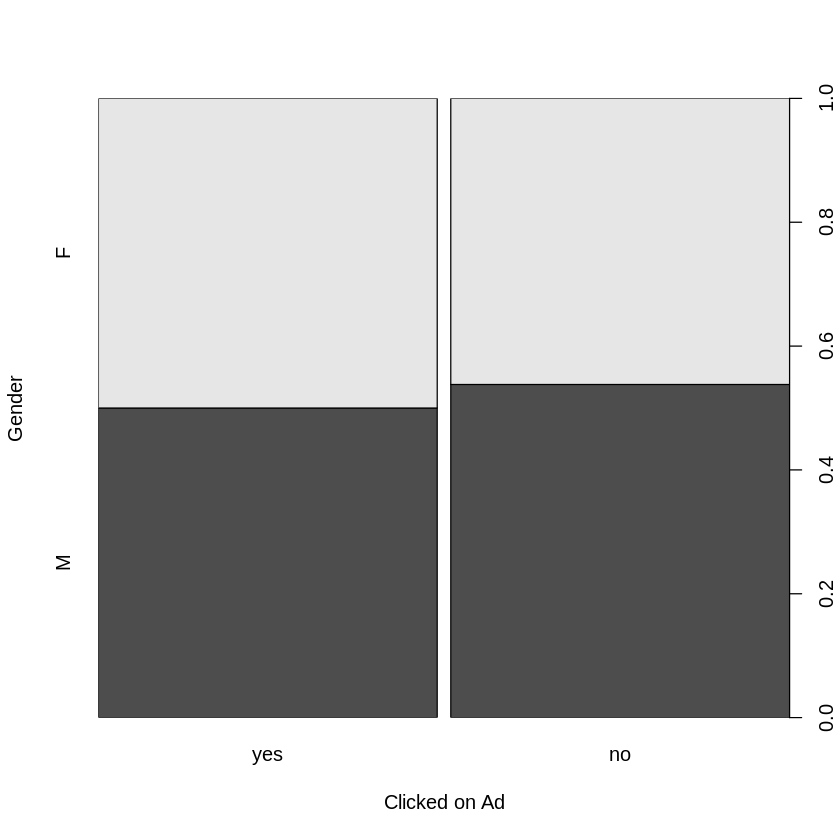

In [53]:
plot(df$clicked_on_ad,df$gender, ylab = "Gender", xlab = "Clicked on Ad")

Generally more females clicked on ad as compared to males

### Question One
Which months had more internet usage?

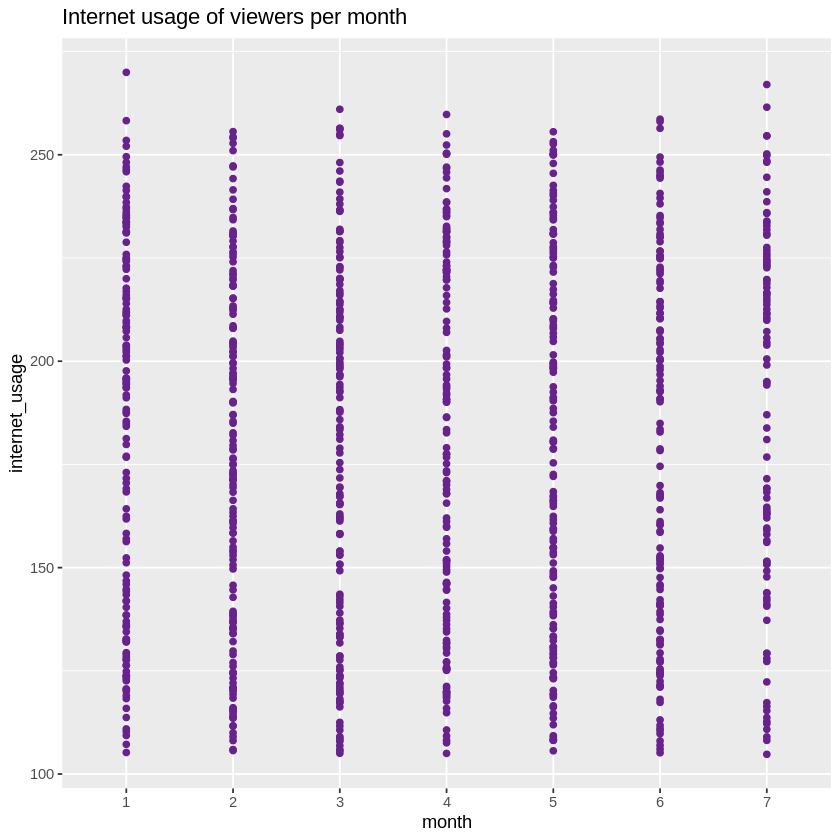

In [54]:
# plot the data using ggplot2
ggplot(data=df_date, aes(x =month, y = internet_usage)) +
      geom_point(color = "darkorchid4") +
      labs(title = "Internet usage of viewers per month")

The months with most internet usage include the first and the seventh month

### Question Two
Which gender is more likely to click on the ads depending on their internet usage?

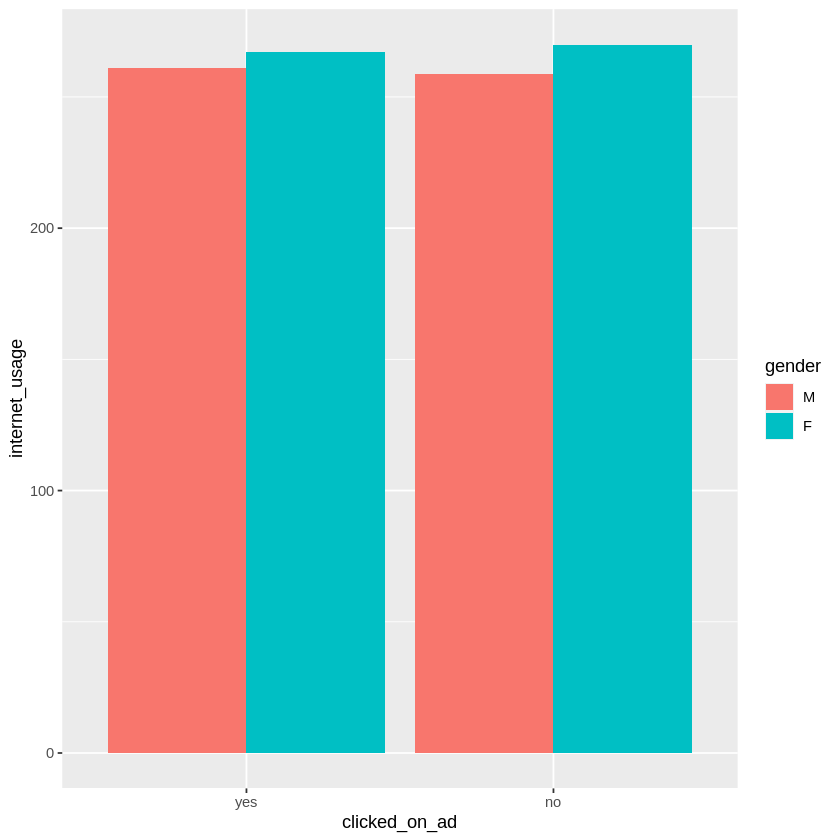

In [55]:
# Stacked barplot with multiple groups
ggplot(data=df, aes(x=clicked_on_ad, y=internet_usage, fill=gender)) +
  geom_bar(stat="identity",position=position_dodge())

More females generally have more internet usage as compared to men, More males are likely to click on the ad as compared to females.

### Question Three:
In which month have the least click on ads based on the time spent on site?

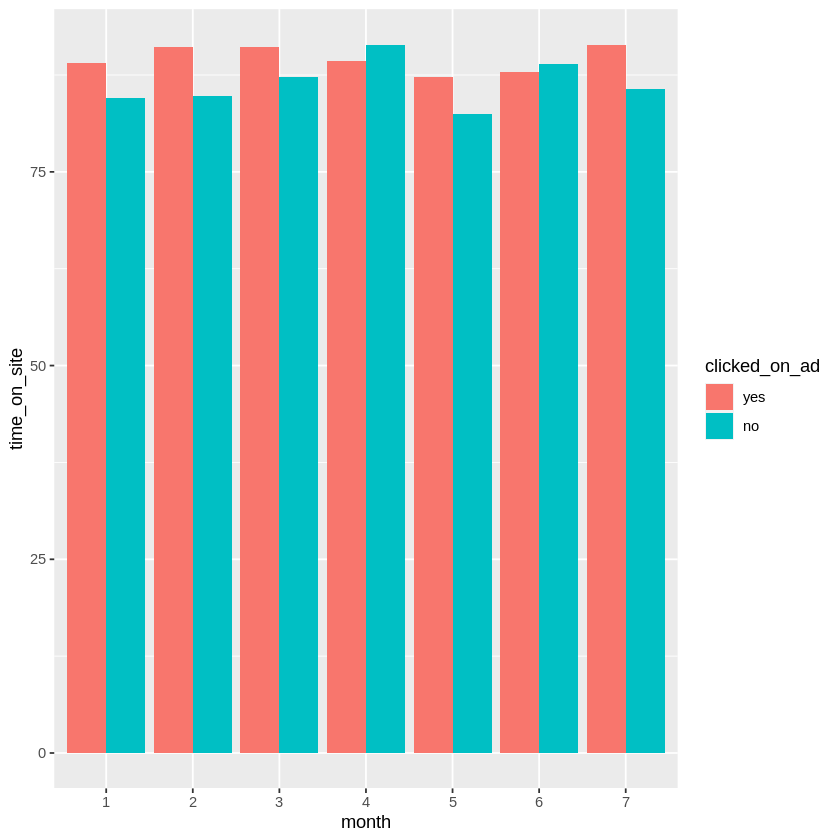

In [56]:
# Stacked barplot with multiple groups
ggplot(data=df, aes(x=month, y=time_on_site, fill=clicked_on_ad)) +
  geom_bar(stat="identity",position=position_dodge())

In the fourth month, the viewers are more likely not to click on ads in as much as that they spend more time on site

# Data Engineering


In [57]:
head(df_date)

,time_on_site,age,income,internet_usage,topic_line,city,gender,country,clicked_on_ad,date,time,year,month,day,id
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<fct>,<date>,<chr>,<fct>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,M,Tunisia,yes,2016-03-27,00:53:11,2016,3,27,1
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,F,Nauru,yes,2016-04-04,01:39:02,2016,4,4,2
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,M,San Marino,yes,2016-03-13,20:35:42,2016,3,13,3
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,F,Italy,yes,2016-01-10,02:31:19,2016,1,10,4
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,M,Iceland,yes,2016-06-03,03:36:18,2016,6,3,5
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,F,Norway,yes,2016-05-19,14:30:17,2016,5,19,6


In [58]:
#Seperating the timestamp to hours, minutes and seconds
df_date<- separate(df_date,'time', c('hour', 'minutes', 'seconds'), sep = ":")
colnames(df_date)

[1] "time_on_site"   "age"            "income"         "internet_usage"
 [5] "topic_line"     "city"           "gender"         "country"       
 [9] "clicked_on_ad"  "date"           "hour"           "minutes"       
[13] "seconds"        "year"           "month"          "day"           
[17] "id"

In [59]:
#as.integer(factor(vec))

df_date$gender1<-as.integer(factor(df_date$gender))
df_date$country1<-as.integer(factor(df_date$country))
df_date$topic_line1<-as.integer(factor(df_date$topic_line))
df_date$city1<-as.integer(factor(df_date$city))
df_date$clicked_on_ad1<- as.integer(factor(df_date$clicked_on_ad))
drop_cols = c('topic_line', 'city',	'gender',	'country', 'date','id', 'clicked_on_ad', 'year')
df1<-df_date%>%select(-drop_cols)
df1

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_cols)` instead of `drop_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



time_on_site,age,income,internet_usage,hour,minutes,seconds,month,day,gender1,country1,topic_line1,city1,clicked_on_ad1
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
68.95,35,61833.90,256.09,00,53,11,3,27,1,216,92,962,1
80.23,31,68441.85,193.77,01,39,02,4,4,2,148,465,904,1
69.47,26,59785.94,236.50,20,35,42,3,13,1,185,567,112,1
74.15,29,54806.18,245.89,02,31,19,1,10,2,104,904,940,1
68.37,35,73889.99,225.58,03,36,18,6,3,1,97,767,806,1
59.99,23,59761.56,226.74,14,30,17,5,19,2,159,806,283,1
88.91,33,53852.85,208.36,20,59,32,1,28,1,146,223,47,1
66.00,48,24593.33,131.76,01,40,15,3,7,2,13,724,672,2
74.53,30,68862.00,221.51,09,33,42,4,18,2,83,108,885,1


# Modelling

## Baseline model

##Multi Linear Regression

In [61]:
colnames(df1)

[1] "time_on_site"   "age"            "income"         "internet_usage"
 [5] "hour"           "minutes"        "seconds"        "month"         
 [9] "day"            "gender1"        "country1"       "topic_line1"   
[13] "city1"          "clicked_on_ad1"

In [63]:
install.packages('VGAM')
# load the package
library(VGAM)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: splines


Attaching package: ‘VGAM’


The following object is masked from ‘package:tidyr’:

    fill




In [66]:
train<-df1[1:700,]
test<-df1[701:980,]

In [74]:
model<- lm(clicked_on_ad1~time_on_site+age+income+internet_usage+hour+minutes+seconds+month+day+gender1+country1+topic_line1+city1,data=df1)
summary(model)


Call:
lm(formula = clicked_on_ad1 ~ time_on_site + age + income + internet_usage + 
    hour + minutes + seconds + month + day + gender1 + country1 + 
    topic_line1 + city1, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57034 -0.11286 -0.02365  0.08061  0.87837 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.467e+00  1.182e-01  29.342  < 2e-16 ***
time_on_site   -1.278e-02  5.571e-04 -22.944  < 2e-16 ***
age             9.107e-03  9.117e-04   9.989  < 2e-16 ***
income         -6.253e-06  5.815e-07 -10.753  < 2e-16 ***
internet_usage -5.276e-03  2.067e-04 -25.527  < 2e-16 ***
hour01          1.606e-02  5.360e-02   0.300  0.76456    
hour02         -7.618e-03  5.155e-02  -0.148  0.88255    
hour03         -8.629e-03  4.981e-02  -0.173  0.86250    
hour04          4.720e-02  4.944e-02   0.955  0.34002    
hour05         -7.374e-02  4.815e-02  -1.531  0.12607    
hour06          1.877e-02  5.009e-02   0.375  0.70791 

The p-value of the F static is <2.2e-16, which shows a high significance.This means at least on of the predictor variables is significantly related to the outcome variable

In [75]:
summary(model)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.467204e+00,1.181649e-01,29.3420773,1.109412e-129
time_on_site,-1.278222e-02,5.571047e-04,-22.9440198,3.052487e-90
age,9.107364e-03,9.117090e-04,9.9893325,3.043798e-22
income,-6.253191e-06,5.815071e-07,-10.7534221,2.607279e-25
internet_usage,-5.276131e-03,2.066922e-04,-25.5265187,4.756744e-106
hour01,1.605919e-02,5.360203e-02,0.2996004,7.645585e-01
hour02,-7.618227e-03,5.154840e-02,-0.1477878,8.825468e-01
hour03,-8.629362e-03,4.981001e-02,-0.1732455,8.625015e-01
hour04,4.719563e-02,4.943570e-02,0.9546871,3.400194e-01
hour05,-7.373936e-02,4.815255e-02,-1.5313697,1.260666e-01


We check the tvalue to determine the significant of the variables to the model
Less significant variables include: 
t vale> 0
* Gender
* Day
* Topic Line
* City
* Country

Most significant variable incude:
* Time on site
* Age
* income
* Internet usage


In [78]:
#New model with most significant variables
model_1<- lm(clicked_on_ad1~time_on_site+age+income+internet_usage,data=df1)
summary(model_1)


Call:
lm(formula = clicked_on_ad1 ~ time_on_site + age + income + internet_usage, 
    data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63848 -0.11736 -0.03329  0.04825  1.02093 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.293e+00  5.722e-02   57.55   <2e-16 ***
time_on_site   -1.275e-02  5.064e-04  -25.18   <2e-16 ***
age             9.017e-03  8.297e-04   10.87   <2e-16 ***
income         -6.169e-06  5.361e-07  -11.51   <2e-16 ***
internet_usage -5.276e-03  1.869e-04  -28.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2108 on 995 degrees of freedom
Multiple R-squared:  0.8232,	Adjusted R-squared:  0.8225 
F-statistic:  1158 on 4 and 995 DF,  p-value: < 2.2e-16


In [79]:
#Checking the confidence interval of the model coefficient
confint(model_1)

,2.5 %,97.5 %
(Intercept),3.180655e+00,3.405221e+00
time_on_site,-1.374279e-02,-1.175543e-02
age,7.388911e-03,1.064533e-02
income,-7.221617e-06,-5.117457e-06
internet_usage,-5.642504e-03,-4.908785e-03


In [80]:
predicted<-predict(model_1,test)
predicted

701       702       703       704       705       706       707       708 
1.3984742 1.8367631 1.0534510 1.0496474 1.0747171 1.0247893 1.5055413 1.0170249 
      709       710       711       712       713       714       715       716 
1.7477016 1.7385128 2.1731928 1.0983072 1.3012827 2.1850026 1.1245831 1.9827642 
      717       718       719       720       721       722       723       724 
2.0357696 1.0861476 1.4328907 1.8751941 0.9529715 1.9685943 1.9104308 1.4523088 
      725       726       727       728       729       730       731       732 
1.0109177 0.9769056 1.0885393 0.9522594 1.2273191 0.9820542 1.3105935 1.0887100 
      733       734       735       736       737       738       739       740 
1.1409280 2.1946804 1.7617052 0.9805092 0.9625000 1.9508011 1.5123629 1.0261487 
      741       742       743       744       745       746       747       748 
1.9848014 1.1915959 1.1725794 1.9634970 1.7764987 1.9618467 1.0235264 2.0659094 
      749       750       751       752       753       754       755       756 
1.9628821 1.6384751 1.8781945 0.9473964 1.1970365 1.1638281 1.0659212 1.1133811 
      757       758       759       760       761       762       763       764 
1.9538079 1.9230094 1.7905889 1.4389331 1.0389821 1.1782140 2.1193311 1.8668053 
      765       766       767       768       769       770       771       772 
2.1993900 2.0140207 1.6336924 2.1349334 1.7969703 1.2195017 1.0400334 1.3672939 
      773       774       775       776       777       778       779       780 
1.0320144 1.5625663 2.0072049 2.1457077 1.5992760 1.0276951 1.9180182 1.0017969 
      781       782       783       784       785       786       787       788 
1.2438018 1.8042921 0.9600241 1.2396784 2.0603463 2.1353897 1.3598991 1.3073424 
      789       790       791       792       793       794       795       796 
1.0786546 2.0513239 1.9713639 2.1396478 1.3032207 1.9422517 2.1999339 1.0794057 
      797       798       799       800       801       802       803       804 
1.0863420 0.9660410 1.3403470 1.0391832 1.8367539 2.0575331 2.1889805 2.2343455 
      805       806       807       808       809       810       811       812 
2.1545276 1.1503018 1.8843891 2.1635752 2.0781745 2.0012052 1.9369661 0.9608169 
      813       814       815       816       817       818       819       820 
1.2113074 1.0930517 0.9691219 1.0067104 2.0755871 1.7706673 1.0152419 1.1522920 
      821       822       823       824       825       826       827       828 
2.0505216 0.9481261 0.9827329 1.0380800 1.0632494 1.1106987 0.9670754 2.1905930 
      829       830       831       832       833       834       835       836 
1.8862854 2.0408045 1.9199148 2.0199277 2.1407162 2.0311207 1.0556388 1.0606048 
      837       838       839       840       841       842       843       844 
2.1668969 2.0596314 2.2058823 2.1016350 1.7811688 2.1030226 1.1176483 1.0258489 
      845       846       847       848       849       850       851       852 
1.0215229 2.0241757 2.0987470 1.2312933 1.0122166 2.0750850 0.9497739 2.0332999 
      853       854       855       856       857       858       859       860 
2.1171671 1.0432739 1.0740079 1.4679589 0.9676769 1.0675235 2.1106023 0.9962551 
      861       862       863       864       865       866       867       868 
1.2499007 1.0893727 1.2843146 0.9849159 1.1242930 2.0879958 1.0729026 1.0709996 
      869       870       871       872       873       874       875       876 
1.0727588 0.9888189 1.6514501 0.9691588 1.1579768 0.9637699 1.2847263 1.9226743 
      877       878       879       880       881       882       883       884 
1.9487992 1.2607935 0.9983965 1.1361152 2.0259618 0.9523054 1.0810200 1.8874545 
      885       886       887       888       889       890       891       892 
1.0121155 2.2361360 2.1954378 2.0605868 1.0407574 2.0153154 0.9603112 1.5486826 
      893       894       895       896       897       898       899       900 
1.7592954 1.0427826 1.0939242 1.18082

This shows if the customer is showing a predictor value of 0.5, he or she is more likely not to click on the ad

# KNN

In [83]:
##create a random number equal 90% of total number of rows
 ran <- sample(1:nrow(df1),0.9 * nrow(df1))
 
 ##the normalization function is created
 normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}
 
 ##normalization function is created
 df2_nor <- normalize(df1)

ERROR: ignored

# Conclusion and Recommendations

> Conclusions

* The viewers who were more likely to click on ad, spent more time on the blog site as compared to those who were not likely to click on site

* Viewers between age 19 and age 36 spend more time on the site as compared to 37 and above

* Viewers earning an 40,000 to 80,000 were more likely to click on the ads as compared to those less likely to click on the ads, those who earn below 40,000

* The viewers more likely to view the ad have more internet usage of about 150 - 250 

* Generally more females clicked on ad as compared to males

* The months with most internet usage include the first and the seventh month

* More females generally have more internet usage as compared to men, More males are likely to click on the ad as compared to females.

* In the fourth month, the viewers are more likely not to click on ads in as much as that they spend more time on site

> Recommendations

* The advert focus group should be:

age - 19 to 36 years

income - income group of 40,000 - 80,000

Gender - Females shoud be more targeted

* More emphasis on advertising should be put on the first, fourth and seventh months since theses are the months with most internet usage include the first and the seventh month

# Version 1. updating version 2